In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Welsh Powell algorithm

In [2]:
def WelshPowell(G):
    #sorting the nodes based on it's degree
    node_list = sorted(G.nodes(), key =lambda x:G.degree[x])
    col_val = {} 
    col_val[node_list[0]] = 0 
    
    for node in node_list[1:]:
        available = [True] * len(G.nodes())

        for adj_node in G.neighbors(node): 
            if adj_node in col_val.keys():
                col = col_val[adj_node]
                available[col] = False
        clr = 0
        for clr in range(len(available)):
            if available[clr] == True:
                break
        col_val[node] = clr
    #print (col_val)
    return col_val


## Creating the Graph

In [3]:
def CreateGraph():
    G = nx.Graph()
    f = open('input.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1]) 
    return G


## Drawing Original Graph

In [4]:
def DrawOriginalGraph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = "green", edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph


## Drawing Solution Graph

In [4]:
def DrawSolutionGraph(G,col_val):
    pos = nx.spring_layout(G)
    values = []
    for node in G.nodes():
        values.append(col_val.get(node, col_val.get(node)))
    nx.draw(G, pos, with_labels = True, node_color = values, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph


## Driving Function

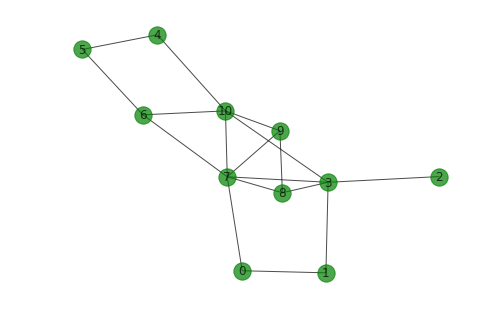

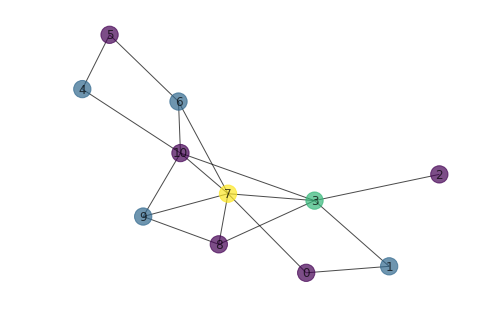

In [6]:
if __name__ == "__main__":
    G = CreateGraph()
    #print(list(G.nodes))
    #print(list(G.edges))
    #print(list(G.adj))
    #print(list(G.degree))
    col_val = WelshPowell(G)
    DrawOriginalGraph(G)
    plt.show()
    DrawSolutionGraph(G,col_val)
    plt.show()